# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [2]:
data = pd.read_csv('Categorical.csv')

In [3]:
data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


Remove the duplicate index column from the dataset. 

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [8]:
data['continent'] = data['continent'].astype('category')

In [9]:
new_data = data.copy()

In [11]:
new_data.continent = data.continent.cat.codes

In [51]:
new_data.continent.unique()

array([4, 2, 0, 3, 7, 5, 1, 6], dtype=int64)

## Select the features

In [27]:
x = new_data.iloc[:,3:4]

In [28]:
x.head()

,continent
0,4
1,2
2,0
3,4
4,3


## Clustering

Use 4 clusters initially.

In [45]:
cluster = KMeans(8)

## Clustering results

In [46]:
cluster.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
new_data['cluster'] = cluster.fit_predict(x)

In [48]:
new_data.head()

,name,Longitude,Latitude,continent,cluster
0,Aruba,-69.982677,12.520880,4,0
1,Afghanistan,66.004734,33.835231,2,2
2,Angola,17.537368,-12.293361,0,1
3,Anguilla,-63.064989,18.223959,4,0
4,Albania,20.049834,41.142450,3,4


## Plot the data

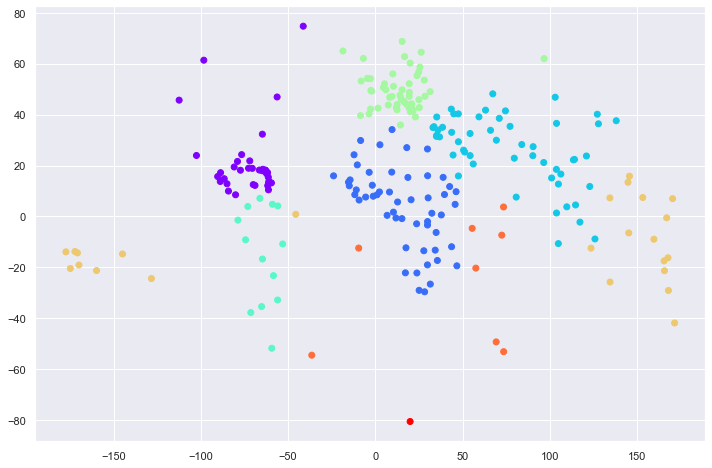

In [49]:
plt.figure(figsize=(12,8))
plt.scatter(new_data.Longitude,new_data.Latitude,c=new_data.cluster,cmap='rainbow')


In [4]:
data.set_index(['continent'],inplace=True)

In [6]:
temp = data.drop(['name'],axis=1)

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.

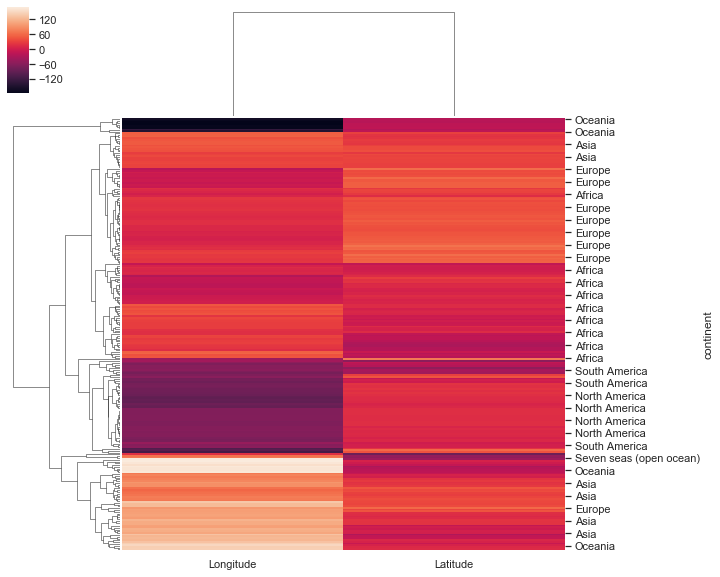

In [7]:
sns.clustermap(temp)